<a href="https://colab.research.google.com/github/bharathmb7/eBPF-project/blob/main/bi-lstm%20and%20bi-gru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


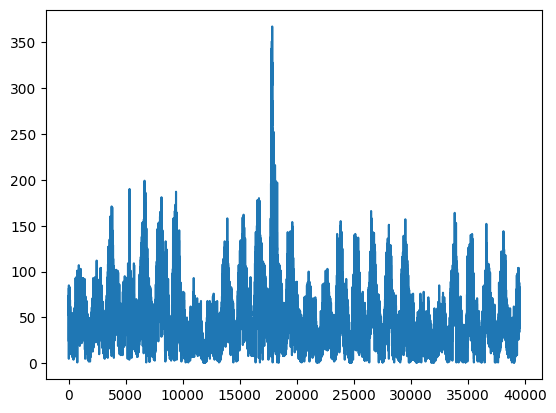

39529


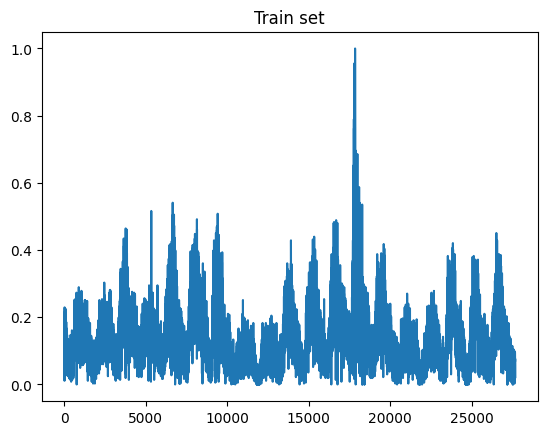

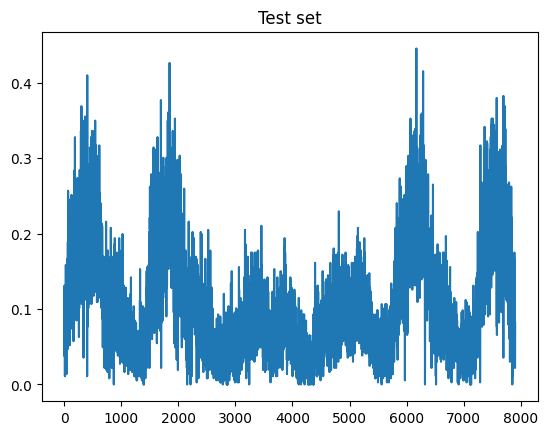

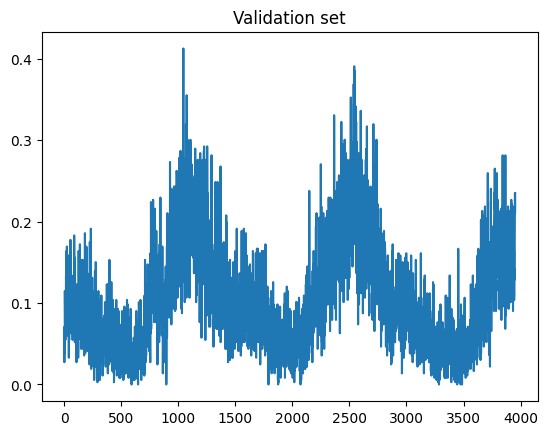

In [14]:

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM,GRU
from keras.layers import Dense
from keras.layers import Bidirectional
from keras.layers import *
from tensorflow.keras import layers, regularizers, models


dataset = pd.read_csv('/content/drive/MyDrive/aggregated_data.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

print(dataset.size)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.7)
test_size = int(len(dataset) * 0.2)
val_size = len(dataset) - train_size - test_size

# split the dataset into train, test, and validation sets
train, test, val = dataset[:train_size], dataset[train_size:train_size+test_size], dataset[train_size+test_size:]

# plot the train set
plt.plot(train)
plt.title("Train set")
plt.show()

# plot the test set
plt.plot(test)
plt.title("Test set")
plt.show()

# plot the validation set
plt.plot(val)
plt.title("Validation set")
plt.show()



# reshape into X=t and Y=t+1
look_back = 10
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)
X_val, y_val = create_dataset(val, look_back)
# print(trainX[:5])
# print(trainY[:5])
# print(valX[:5])



# reshape input to be [samples, time steps, features]

X_train = X_train.reshape( (X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape( (X_test.shape[0],X_train.shape[1], 1))
#testY=testY.reshape((trainY.shape[1],trainY.shape[0]))
X_val = X_val.reshape( (X_val.shape[0],X_val.shape[1], 1))
# print(trainX.shape)
# print(trainY.shape)
# print(testX.shape)
# print(testY.shape)
#print(valX.shape)

In [15]:
dataset

array([[0.06557377],
       [0.11202186],
       [0.19945355],
       ...,
       [0.23497268],
       [0.21038251],
       [0.23497268]])

In [16]:
X_train.shape

(27659, 10, 1)

In [17]:
y_train.shape

(27659,)

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

import tensorflow as tf

# Define model hyperparameters
input_shape = (10, 1)  # Input shape for a time series of 10 values
output_dim = 1  # Output dimension for regression task
hidden_units = 32  # Number of units in each BiGRU layer
dropout_rate = 0.2  # Dropout rate to prevent overfitting
learning_rate = 0.001  # Learning rate for optimization
epochs = 50  # Number of training epochs
batch_size = 32  # Batch size for training

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(hidden_units, activation='tanh', dropout=dropout_rate, return_sequences=True, input_shape=input_shape)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(hidden_units, activation='tanh', dropout=dropout_rate)),
    tf.keras.layers.Dense(output_dim, activation='linear')
])

# Compile the model with mean squared error loss and Adam optimizer
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(lr=learning_rate))



In [19]:
# Train the model with early stopping and validation set
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), callbacks=[early_stop])



Epoch 1/50
865/865 [==============================] - 29s 23ms/step - loss: 0.0026 - val_loss: 0.0020
Epoch 2/50
865/865 [==============================] - 17s 20ms/step - loss: 0.0025 - val_loss: 0.0016
Epoch 3/50
865/865 [==============================] - 18s 20ms/step - loss: 0.0025 - val_loss: 0.0015
Epoch 4/50
865/865 [==============================] - 18s 21ms/step - loss: 0.0024 - val_loss: 0.0016
Epoch 5/50
865/865 [==============================] - 19s 21ms/step - loss: 0.0024 - val_loss: 0.0015
Epoch 6/50
865/865 [==============================] - 19s 22ms/step - loss: 0.0024 - val_loss: 0.0016
Epoch 7/50
865/865 [==============================] - 17s 20ms/step - loss: 0.0023 - val_loss: 0.0015
Epoch 8/50
865/865 [==============================] - 19s 22ms/step - loss: 0.0023 - val_loss: 0.0017
Epoch 9/50
865/865 [==============================] - 17s 20ms/step - loss: 0.0022 - val_loss: 0.0017
Epoch 10/50
865/865 [==============================] - 17s 20ms/step - loss: 0.002

In [20]:
# Evaluate the model on test set
test_loss = model.evaluate(X_test, y_test)



247/247 [==============================] - 1s 6ms/step - loss: 0.0018


In [21]:
# Make predictions on test set
y_pred = model.predict(X_test)

247/247 [==============================] - 3s 5ms/step


In [22]:
import time
trainX=X_train
testX=X_test
valX=X_val
trainY=y_train
testY=y_test
valY=y_val
trainPredict = model.predict(trainX)
start_time = time.time()
testPredict = model.predict(testX)
valPredict = model.predict(valX)
end_time = time.time()
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
valPredict = scaler.inverse_transform(valPredict)
valY = scaler.inverse_transform([valY])

124/124 [==============================] - 1s 5ms/step


Train Score: 18.53 RMSE
Test Score: 15.35 RMSE
Time taken for prediction: 2.14 seconds


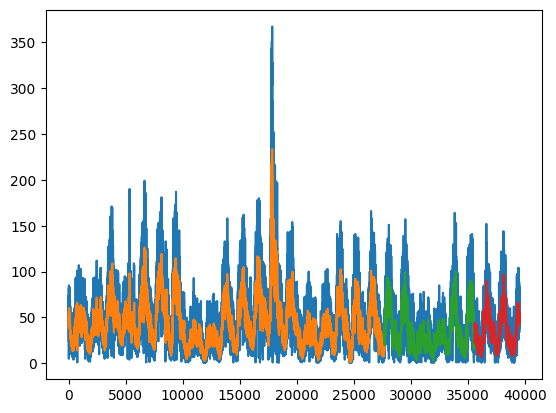

In [23]:
from sklearn.metrics import mean_squared_error
#  calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))



print('Time taken for prediction: {:.2f} seconds'.format(end_time - start_time))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+1:len(trainPredict)+len(testPredict)+1, :] = testPredict

valPredictPlot = np.empty_like(dataset)
valPredictPlot[:, :] = np.nan
valPredictPlot[-(len(valPredict)):, :] = valPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))

plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.plot(valPredictPlot)
plt.show()